## Project Title: Predictive Modeling of Heart Disease

# Student Name: Ankita Tiwari
# Institution: Madhav Institute of Technology and Science
# Branch: Artificial Intelligence and Machine Learning
# Date: 27-06-2025

## 1. Introduction

Cardiovascular diseases are the leading cause of death globally. Early detection of heart disease is vital for improving patient outcomes. This project uses machine learning and deep learning techniques to build predictive models for diagnosing heart disease based on patient data from the UCI Cleveland Heart Disease dataset.

Objective: To build and compare multiple classification models to predict whether a patient has heart disease or not (binary classification).

## 2. Data Understanding and Exploration (EDA)

Dataset: UCI Cleveland Heart Disease Dataset (raw version with 14 attributes).

Steps Performed:

Loaded the dataset and assigned appropriate column names.

Replaced missing values marked as '?' with NaN and converted necessary columns to numeric.

Checked for and removed duplicate rows.

Analyzed the distribution of each feature using histograms and boxplots.

Explored the balance of the target variable.

Used pairplots and heatmaps to understand feature relationships.

Key Observations:

Target variable was originally multiclass (0-4); converted to binary: 0 (no disease), 1 (disease present).

Some features like 'thalach', 'oldpeak', and 'cp' show significant separation between classes.

In [1]:
import pandas as pd

column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("processed.cleveland.data", names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
df.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0         1
59.0  1.0  4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0         1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2         1
           3.0  150.0     212.0  1.0  0.0      157.0    0.0    1.6      1.0    0.0  3.0   0         1
                126.0     218.0  1.0  0.0      134.0    0.0    2.2      2.0    1.0  6.0   2         1
                                                                                                   ..
51.0  1.0  3.0  100.0     222.0  0.0  0.0      143.0    1.0    1.2      2.0    0.0  3.0   0         1
                94.0      227.0  0.0  0.0      154.0    1.0    0.0      1.0    1.0  7.0   0         1
           1.0  125.0     213.0  0.0  2.0      125.0    1.0    1.4      1.0    1.0  3.0

In [5]:
df.describe() # gives me the statistical analysis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
df.isnull().sum() # check for missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [4]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert to numeric (force non-numeric to NaN)
for col in ['ca', 'thal']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with any NaNs (optional, or use imputation)
df.dropna(inplace=True)

# Ensure all columns are now numeric
df = df.astype(float)


In [9]:
df['target'] = df['target'].astype(float)  # Ensure correct type
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


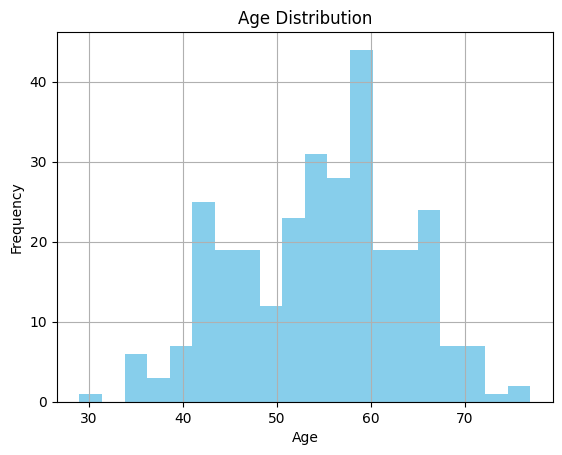

In [11]:
df['age'].hist(bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

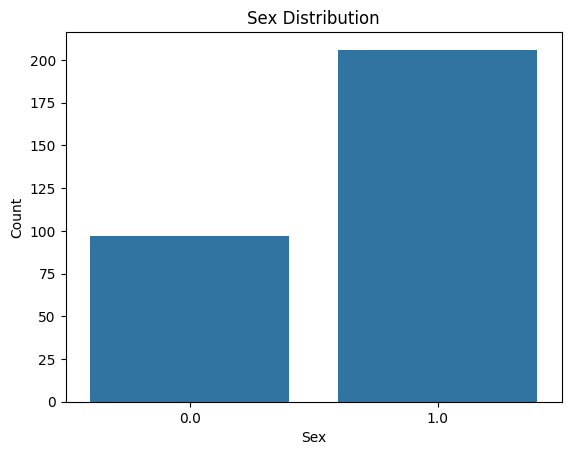

In [11]:
import seaborn as sns

sns.countplot(data=df, x='sex')  # sex: 0 = female, 1 = male
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

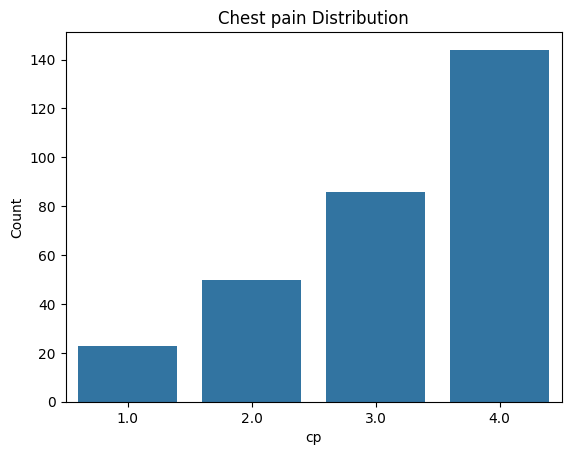

In [12]:
# cp in dataset stands for the chest pain
sns.countplot(data=df, x='cp')  # sex: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic
plt.title('Chest pain Distribution')
plt.xlabel('cp')
plt.ylabel('Count')
plt.show()


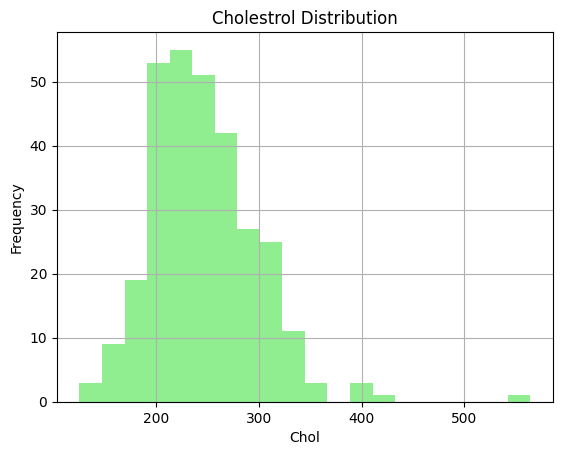

In [13]:
df['chol'].hist(bins=20, color='lightgreen')
plt.title('Cholestrol Distribution')
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.show()

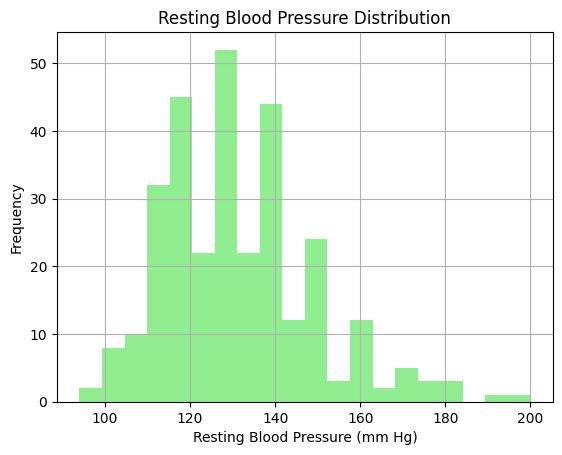

In [14]:
df['trestbps'].hist(bins=20, color='lightgreen')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

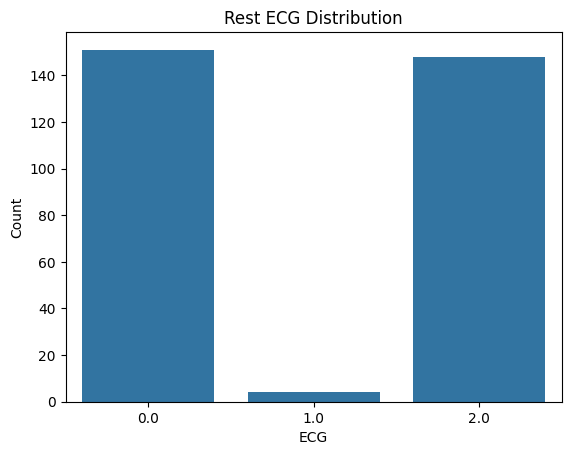

In [15]:

sns.countplot(data=df, x='restecg')  
plt.title('Rest ECG Distribution')
plt.xlabel('ECG')
plt.ylabel('Count')
plt.show()

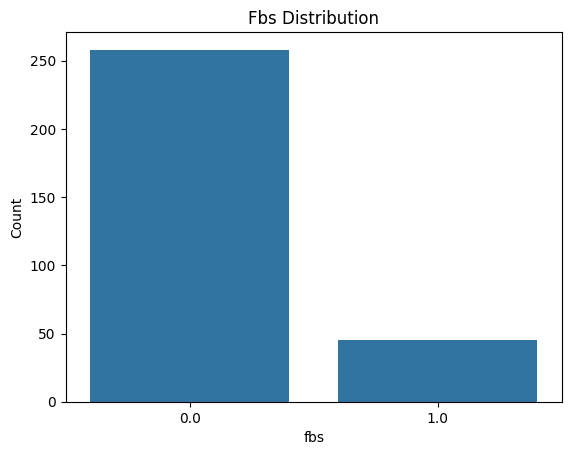

In [16]:

sns.countplot(data=df, x='fbs')  
plt.title('Fbs Distribution')
plt.xlabel('fbs')
plt.ylabel('Count')
plt.show()

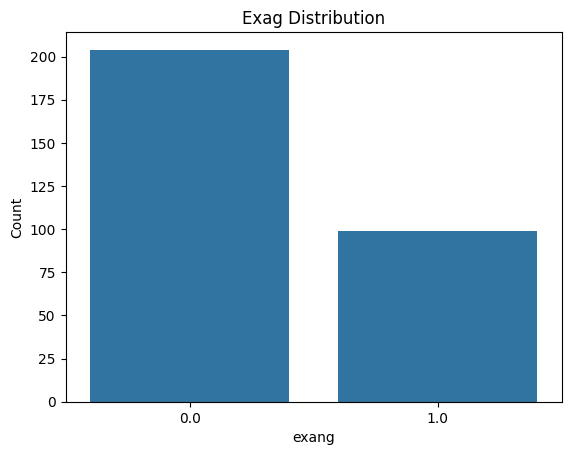

In [17]:
sns.countplot(data=df, x='exang')  
plt.title('Exag Distribution')
plt.xlabel('exang')
plt.ylabel('Count')
plt.show()

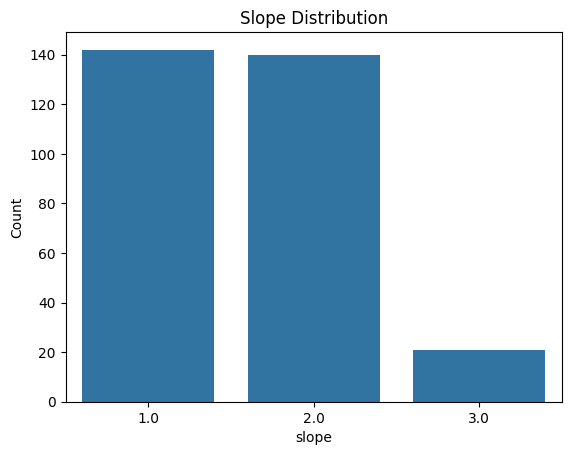

In [18]:

sns.countplot(data=df, x='slope')  
plt.title('Slope Distribution')
plt.xlabel('slope')
plt.ylabel('Count')
plt.show()

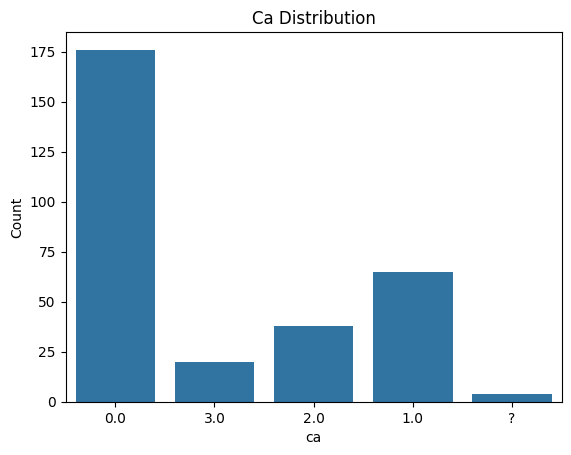

In [19]:

sns.countplot(data=df, x='ca')  
plt.title('Ca Distribution')
plt.xlabel('ca')
plt.ylabel('Count')
plt.show()

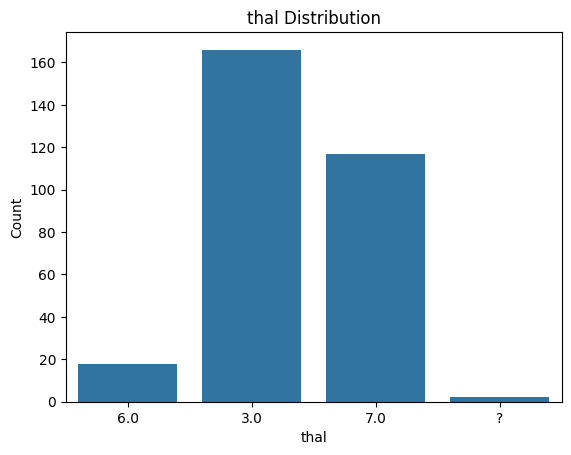

In [20]:

sns.countplot(data=df, x='thal')  
plt.title('thal Distribution')
plt.xlabel('thal')
plt.ylabel('Count')
plt.show()

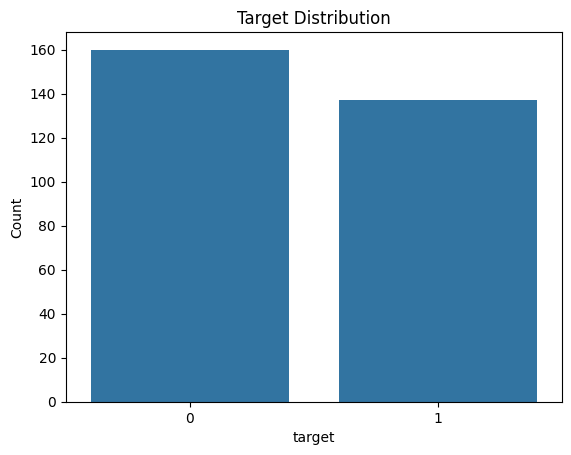

In [12]:

sns.countplot(data=df, x='target')  
plt.title('Target Distribution')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

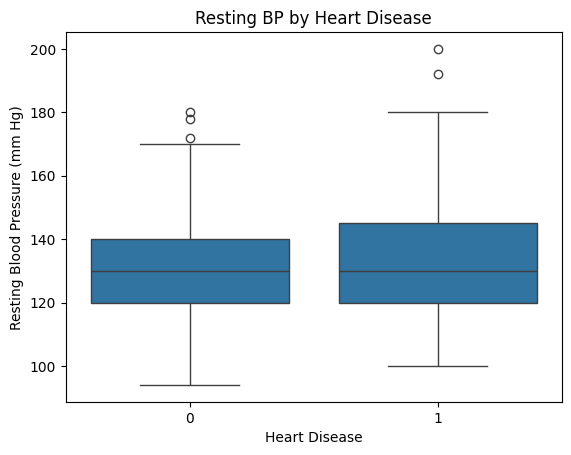

In [13]:
## Checking relation with target
sns.boxplot(data=df, x='target', y='trestbps')
plt.title('Resting BP by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

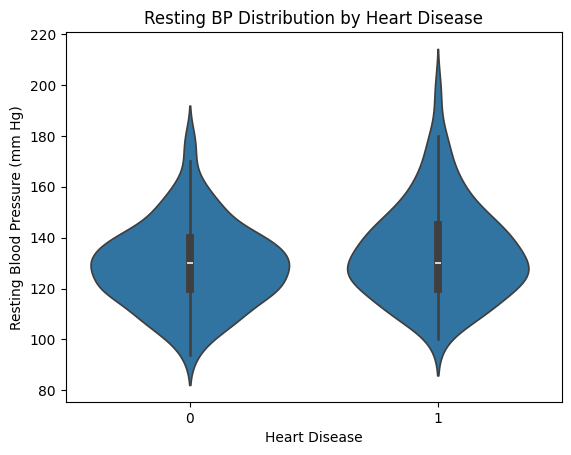

In [14]:
sns.violinplot(data=df, x='target', y='trestbps')
plt.title('Resting BP Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

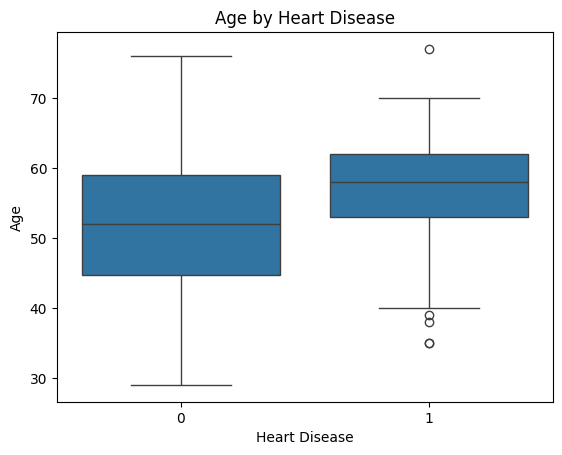

In [15]:
sns.boxplot(data=df, x='target', y='age')
plt.title('Age by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


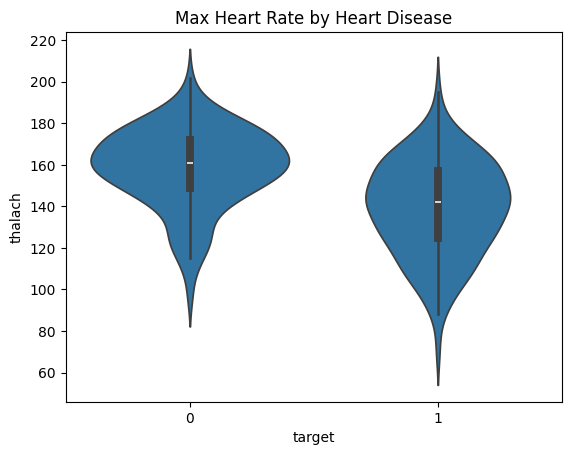

In [16]:
sns.violinplot(data=df, x='target', y='thalach')
plt.title('Max Heart Rate by Heart Disease')
plt.show()


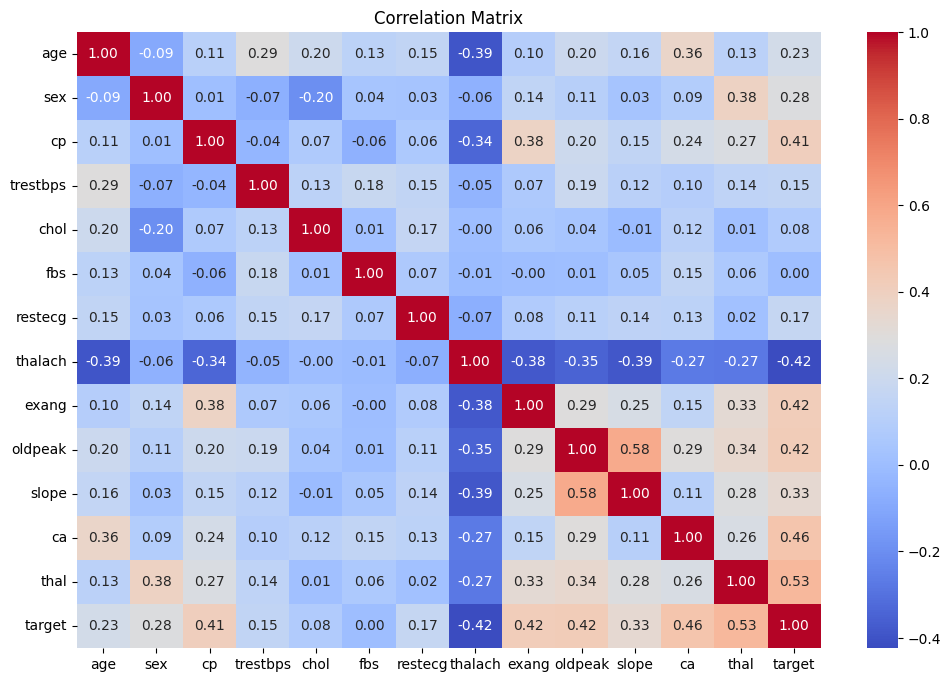

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

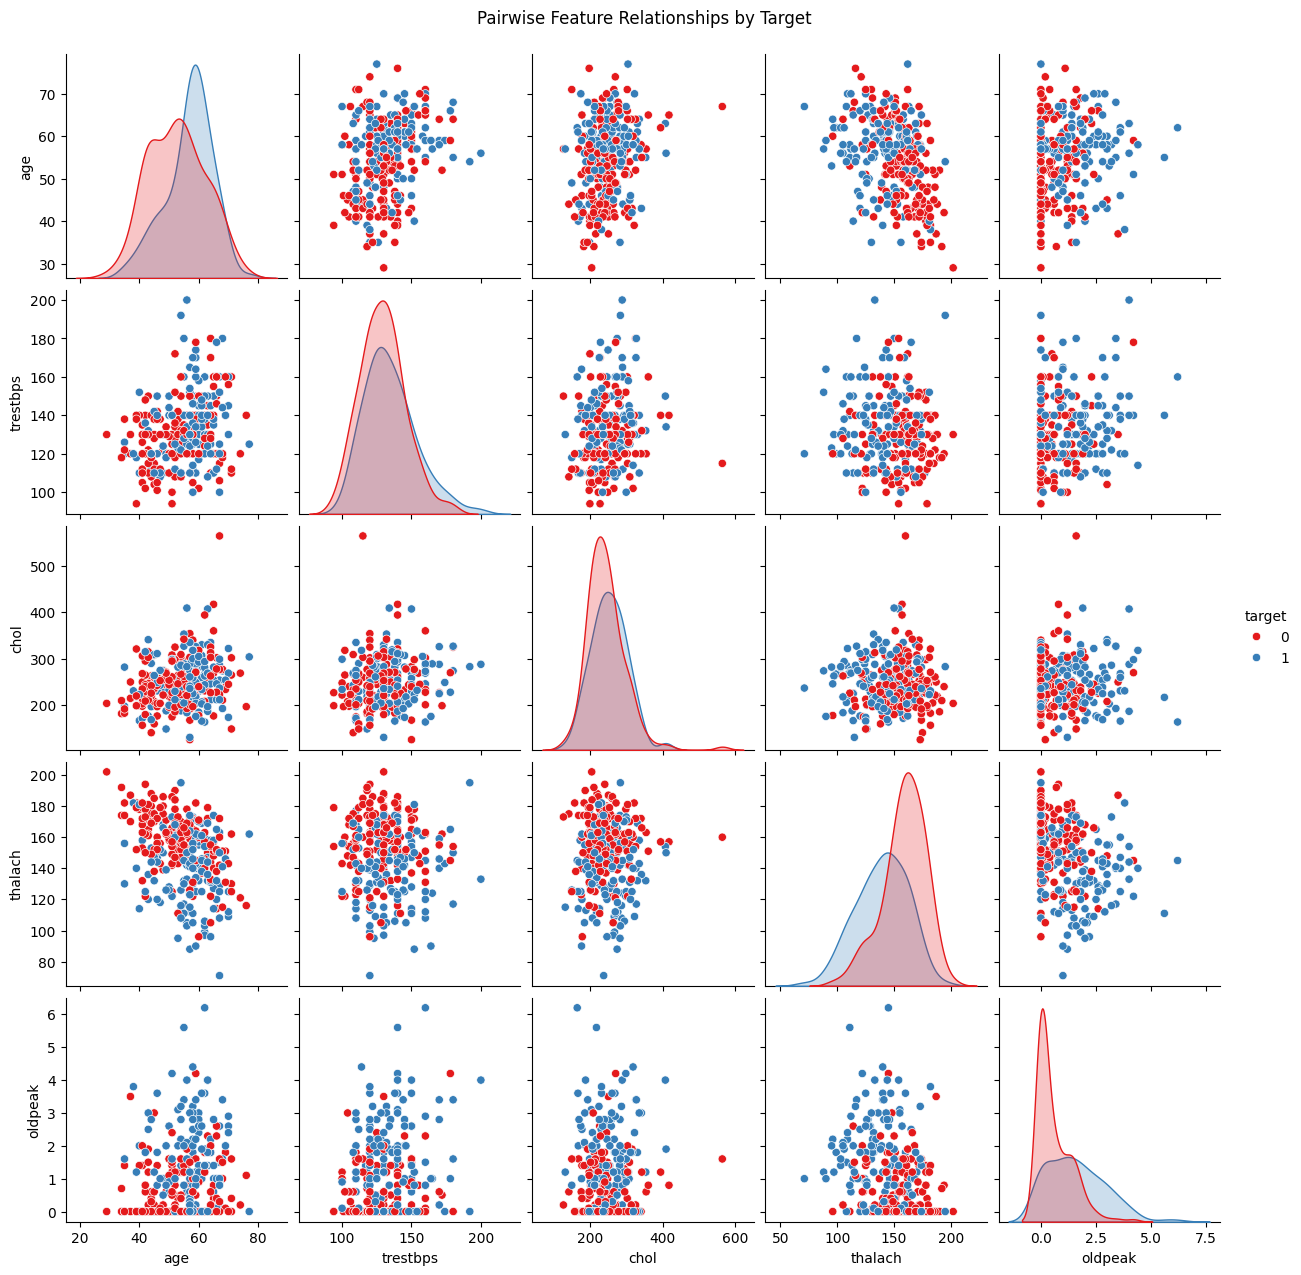

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a subset of relevant features
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

sns.pairplot(df[features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships by Target', y=1.02)
plt.show()


In [8]:
print(df['target'].value_counts())


target
0.0    160
1.0     54
2.0     35
3.0     35
4.0     13
Name: count, dtype: int64


target
0    160
1    137
Name: count, dtype: int64


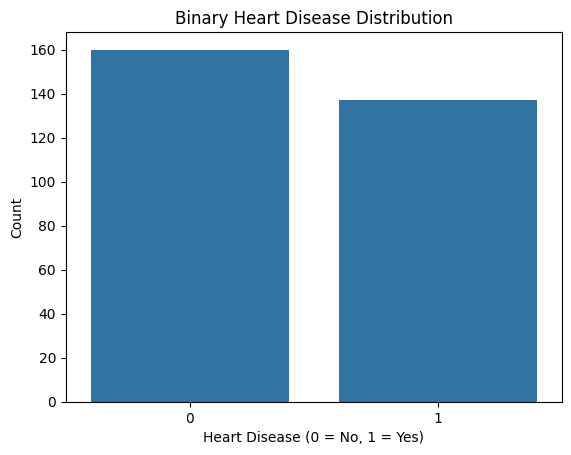

In [19]:
print(df['target'].value_counts())
sns.countplot(data=df, x='target')
plt.title('Binary Heart Disease Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## 3. Data Preprocessing and Feature Engineering

Steps Performed:

Handled missing values by converting '?' to NaN and dropping rows with missing data.

Applied one-hot encoding to categorical features: 'cp', 'restecg', 'slope', 'thal'.

Scaled numerical features using StandardScaler.

Result: Cleaned and transformed dataset ready for training, with features (X) and binary target (y).



In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
# converted target to binary class
# One hot encoding on categorical variables 
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [22]:
## Seperate independent features - X
# Dependent feature as y
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']


In [23]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


## Model Training and Development

## Machine Learning Model

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [25]:
## 1. Logistice Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [26]:
## 2. K-Nearest Neighbors (with GridSearchCV)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': range(3, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Best KNN params:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test)
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

Best KNN params: {'n_neighbors': 6}
KNN Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [27]:
##  3. Support Vector Machine (SVM with tuning)

from sklearn.svm import SVC

param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 0.01], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

Best SVM params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [28]:
## 4. Gradient Boosting (using XGBoost)

import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



C:\Users\ANKITA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:50:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Train Deep Learning Model (MLP)
A Multilayer Perceptron (MLP) using TensorFlow/Keras:

Input layer: 64 neurons (ReLU)

Hidden layer: 32 neurons (ReLU)

Dropout: 30%

Output: 1 neuron (Sigmoid)

Optimizer: Adam

Loss: Binary crossentropy

Trained for 50 epochs

In [ ]:
## Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [30]:
## train and build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\ANKITA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
## Train the Model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4694 - loss: 0.7462 - val_accuracy: 0.7292 - val_loss: 0.6463
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5745 - loss: 0.6710 - val_accuracy: 0.7083 - val_loss: 0.6102
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6592 - loss: 0.6178 - val_accuracy: 0.7292 - val_loss: 0.5811
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6754 - loss: 0.6028 - val_accuracy: 0.7500 - val_loss: 0.5572
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6955 - loss: 0.5426 - val_accuracy: 0.7292 - val_loss: 0.5385
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7216 - loss: 0.5137 - val_accuracy: 0.7292 - val_loss: 0.5208
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8249 - loss: 0.4634 - val_accuracy: 0.7292 - val_loss: 0.5084
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8577 - loss: 0.4047 - val_accuracy: 0.7292 - val_loss: 0.4992
Epoch

In [32]:
## Model evaluation 
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("MLP (TensorFlow) Report:\n", classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MLP (TensorFlow) Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



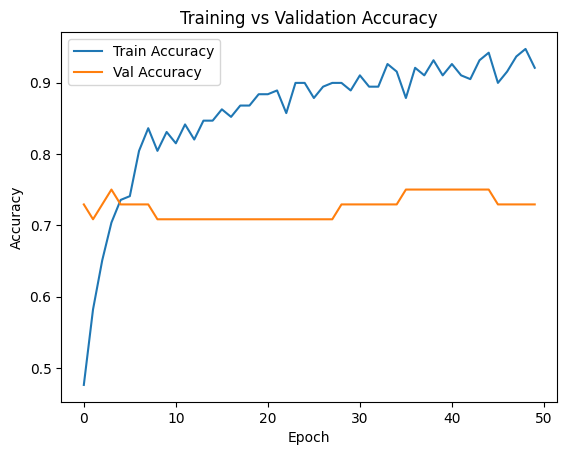

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model Evaluation and Comparison
Evaluation Metrics Used:

Accuracy

Precision

Recall

F1-Score

AUC-ROC

Confusion Matrix

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict(X_test)

    y_pred = (y_prob > 0.5).astype(int)

    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No Disease", "Disease"]).plot()



--- Logistic Regression ---
Accuracy: 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.7857142857142857
F1 Score: 0.8148148148148148
AUC-ROC: 0.9497767857142857

--- KNN ---
Accuracy: 0.8
Precision: 0.8636363636363636
Recall: 0.6785714285714286
F1 Score: 0.76
AUC-ROC: 0.896763392857143

--- SVM ---
Accuracy: 0.8333333333333334
Precision: 0.875
Recall: 0.75
F1 Score: 0.8076923076923077
AUC-ROC: 0.828125

--- XGBoost ---
Accuracy: 0.8666666666666667
Precision: 0.8846153846153846
Recall: 0.8214285714285714
F1 Score: 0.8518518518518519
AUC-ROC: 0.8950892857142858
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  

--- TensorFlow MLP ---
Accuracy: 0.8333333333333334
Precision: 0.875
Recall: 0.75
F1 Score: 0.8076923076923077
AUC-ROC: 0.9363839285714286


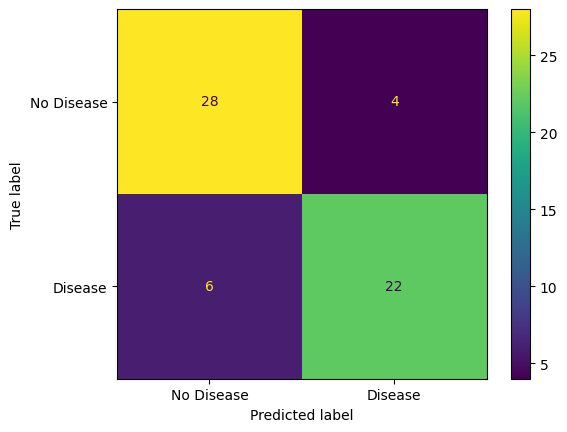

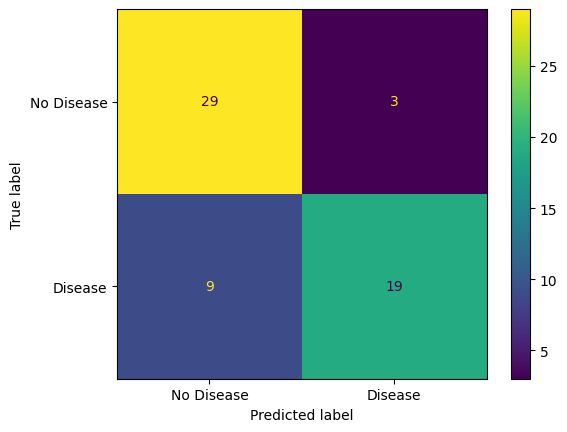

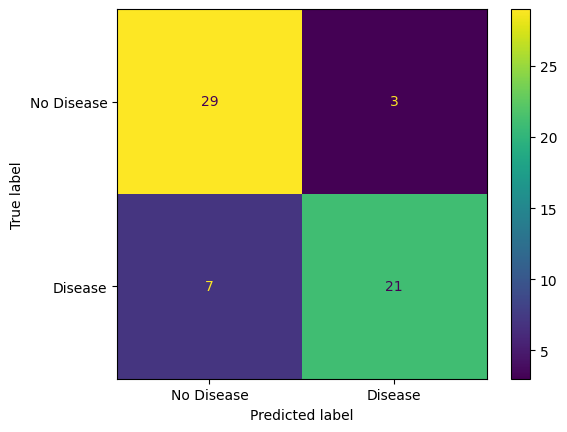

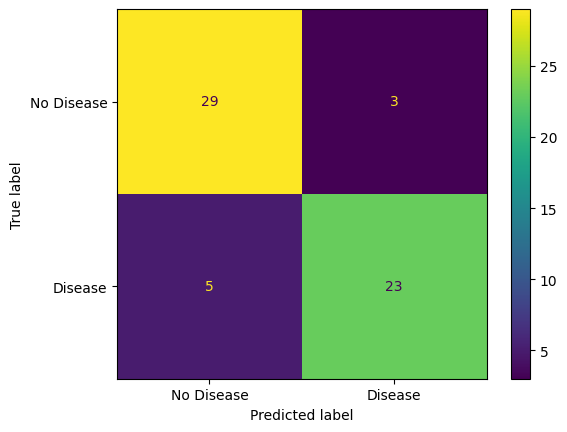

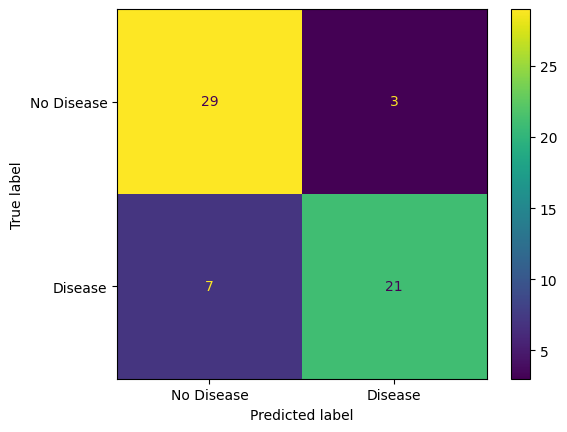

In [35]:
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(grid_knn, X_test, y_test, "KNN")
evaluate_model(grid_svm, X_test, y_test, "SVM")
evaluate_model(xgb_clf, X_test, y_test, "XGBoost")
evaluate_model(model, X_test, y_test, "TensorFlow MLP")


In [36]:
results = []

def collect_metrics(model, X_test, y_test, name):
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict(X_test)

    y_pred = (y_prob > 0.5).astype(int)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    })

# Collect metrics
collect_metrics(log_reg, X_test, y_test, "Logistic Regression")
collect_metrics(grid_knn, X_test, y_test, "KNN")
collect_metrics(grid_svm, X_test, y_test, "SVM")
collect_metrics(xgb_clf, X_test, y_test, "XGBoost")
collect_metrics(model, X_test, y_test, "TensorFlow MLP")

# Create DataFrame
import pandas as pd
summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by="AUC-ROC", ascending=False))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.833333   0.846154  0.785714  0.814815  0.949777
4       TensorFlow MLP  0.833333   0.875000  0.750000  0.807692  0.936384
1                  KNN  0.800000   0.863636  0.678571  0.760000  0.896763
3              XGBoost  0.866667   0.884615  0.821429  0.851852  0.895089
2                  SVM  0.833333   0.875000  0.750000  0.807692  0.828125


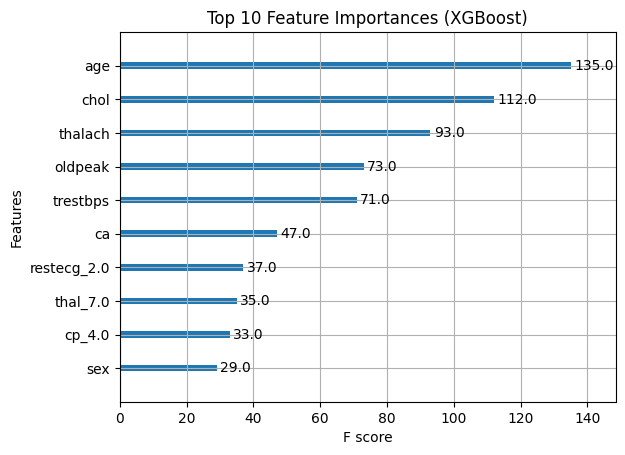

In [37]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf, max_num_features=10)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


## Conclusion

This project demonstrated a full machine learning pipeline on the UCI Cleveland dataset. Through cleaning, exploration, model building, and evaluation, XGBoost and TensorFlow MLP emerged as top-performing models. This work highlights how even a relatively small dataset, when properly processed and analyzed, can yield highly effective predictive models for heart disease diagnosis.

NameError: name 'log_reg' is not defined